In [291]:
%cd /Users/gwg/local/dmcm
%matplotlib inline

/Users/gwg/local/dmcm


In [292]:
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import CCA
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import seaborn

In [293]:
def plot_corr(X, ax):
    corr = X.corr()
    seaborn.heatmap(corr,
                    ax=ax,
                    xticklabels=corr.columns,
                    yticklabels=corr.columns)
    
def anno(ax, label, x, y, i):
    ax.annotate(label,
                xy=(x, y), xytext=(-20, 20),
                textcoords='offset points', ha='right', va='bottom',
                bbox=dict(boxstyle='round,pad=0.5', fc=cmap(i), alpha=0.5),
                arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))


def cmap(n):
    return ['red', 'yellow', 'blue', 'green', 'purple'][n]

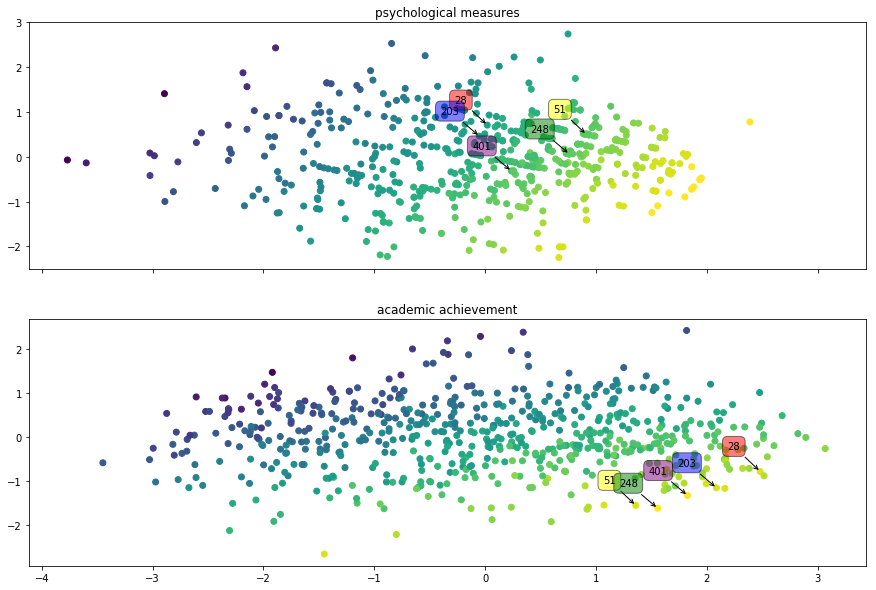

In [302]:
# Generate two correlated datasets and visualize.

X = pd.read_csv('analysis/mmreg.csv')
X = X.iloc[:,:-1]

plot_corr(pd.DataFrame(data=psych), axes[0])
plot_corr(pd.DataFrame(data=acadm), axes[1])

psych = X.iloc[:,:3]
acadm = X.iloc[:,3:]

X_KEY = 'locus_of_control'
Y_KEY = 'science'
SORT_KEY = Y_KEY

N_LARGEST = 5
use_pca = False
top_n = X.nlargest(N_LARGEST, columns=SORT_KEY).index.tolist()

if use_pca:
    pca = PCA(n_components=2)
    pca.fit(X)
    X_c = pca.transform(X)

    fig, ax = plt.subplots(1)
    fig.set_size_inches(15, 10)
    
    count = 0
    for i, (x, y) in enumerate(zip(X_c[:,0], X_c[:,1])):
        if i in top_n:
            anno(ax, i, x, y, count)
            count += 1

    ax.scatter(X_c[:,0], X_c[:,1], c=X[SORT_KEY])
    ax.set_title('psychological measures & academic achievement')
else:
    cca = CCA(n_components=2)
    cca.fit(psych, acadm)
    X_c, Y_c = cca.transform(psych, acadm)

    fig, axes = plt.subplots(2, sharex=True)
    fig.set_size_inches(15, 10)
    
    count = 0
    for i, (x, y) in enumerate(zip(X_c[:,0], X_c[:,1])):
        if i in top_n:
            anno(axes[0], i, x, y, count)
            count += 1
            
    count = 0
    for i, (x, y) in enumerate(zip(Y_c[:,0], Y_c[:,1])):
        if i in top_n:
            anno(axes[1], i, x, y, count)
            count += 1

    axes[0].scatter(X_c[:,0], X_c[:,1], c=X[X_KEY].as_matrix())
    axes[0].set_title('psychological measures')

    axes[1].scatter(Y_c[:,0], Y_c[:,1], c=X[Y_KEY].as_matrix())
    axes[1].set_title('academic achievement')
    
plt.show()